<a href="https://colab.research.google.com/github/StillWork/ds-lab/blob/master/gg_51_MNIST_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# f-6-MNIST-keras
- 케라스를 이용한 MNIST

## 데이터 로드

In [1]:
# !pip install keras

In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical

Using TensorFlow backend.
C:\Users\rta_note\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\rta_note\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\rta_note\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\rta_note\Anaconda3\lib\site-packages\tensorflow\python\framewo

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape, test_images.shape)

(60000, 28, 28) (10000, 28, 28)


In [4]:
train_labels.shape

(60000,)

In [8]:
type(train_labels[0]), train_labels[0]

(numpy.uint8, 5)

In [9]:
train_images[0,0,0]

0

## MNIST 이미지 확인 및 데이터 전처리

In [10]:
# !pip install matplotlib

<function matplotlib.pyplot.show(*args, **kw)>

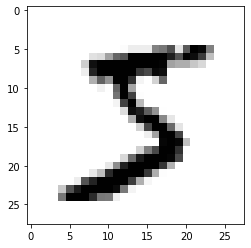

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.show

In [12]:
# just for checking
train_labels.shape, test_labels.shape
print(type(train_labels), train_labels[:10])

<class 'numpy.ndarray'> [5 0 4 1 9 2 1 3 1 4]


In [13]:
train_images.shape

(60000, 28, 28)

In [14]:
train_labels.dtype

dtype('uint8')

In [15]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)   # one-hot encoding
test_labels = to_categorical(test_labels)

In [16]:
print(type(train_labels), train_labels[:10])

<class 'numpy.ndarray'> [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## MLP 로 구현(케라스 사용)

In [18]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(100, activation='relu', input_shape = (28, 28, 1))) # fully-connected
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 28, 28, 100)       200       
_________________________________________________________________
dense_4 (Dense)              (None, 28, 28, 100)       10100     
_________________________________________________________________
flatten_1 (Flatten)          (None, 78400)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                784010    
Total params: 794,310
Trainable params: 794,310
Non-trainable params: 0
_________________________________________________________________


In [23]:
# model.input
# model.output
# model.input_shape
# model.output_shape

In [24]:
model.compile(optimizer= 'rmsprop',             # set up hyperparamers
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [25]:
model.fit(train_images, train_labels, epochs=5, batch_size=1000)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 217s 4ms/step - loss: 0.5374 - accuracy: 0.8351
Epoch 2/5
60000/60000 [==============================] - 211s 4ms/step - loss: 0.3355 - accuracy: 0.9018
Epoch 3/5
60000/60000 [==============================] - 206s 3ms/step - loss: 0.3076 - accuracy: 0.9102
Epoch 4/5
60000/60000 [==============================] - 299s 5ms/step - loss: 0.2926 - accuracy: 0.9163
Epoch 5/5
60000/60000 [==============================] - 247s 4ms/step - loss: 0.2859 - accuracy: 0.9169


In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc = ',test_acc)

10000/10000 [==============================] - 13s 1ms/step
test_acc =  0.9240999817848206


## CNN 모델 생성

In [27]:
# keras.layers.Conv2D(filters, kernel_size,...)
# - filters: the dimensionality of the output space (the number of output filters).
# - parameter 수: 입력채널수 X 필터폭 X 필터높이 X 출력채널수 
# - bias 도 고려

In [28]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (28, 28, 1)))
print(model.output_shape)
model.add(layers.MaxPooling2D((2,2)))
print(model.output_shape)
model.add(layers.Conv2D(64, (3,3), activation='relu'))
print(model.output_shape)
model.add(layers.MaxPooling2D((2,2)))
print(model.output_shape)
model.add(layers.Conv2D(64, (3,3), activation='relu'))
print(model.output_shape)

model.add(layers.Flatten())
print(model.output_shape)
model.add(layers.Dense(10, activation='softmax'))
print(model.output_shape)

model.summary()   

(None, 26, 26, 32)
(None, 13, 13, 32)
(None, 11, 11, 64)
(None, 5, 5, 64)
(None, 3, 3, 64)
(None, 576)
(None, 10)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
______

In [29]:
# number of parameters
# conv2d_1 : (3*3 + 1) * 32 = 320
# conv2d_2 : (32*3*3 + 1) * 64 = 18496
# conv2d_3 : (64*3*3 + 1) * 64 = 36928
# dense_6 : 576*10 + 10 = 5770

## 훈련

In [30]:
model.compile(optimizer= 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [31]:
model.fit(train_images, train_labels, epochs=3, batch_size=64)

Epoch 1/3
60000/60000 [==============================] - 84s 1ms/step - loss: 0.1774 - accuracy: 0.9456
Epoch 2/3
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0485 - accuracy: 0.9852
Epoch 3/3
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0335 - accuracy: 0.9894


In [33]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc = ',test_acc)

10000/10000 [==============================] - 6s 636us/step
test_acc =  0.9909999966621399
